In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:57<00:00, 22.1MB/s]
100% 1.06G/1.06G [00:57<00:00, 19.9MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [5]:
# Generators ---> divides the whole data into batches
# At one time in RAM, only one batch loads
# After moving away of one batch, next batch loads

train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',   # cats -> 0 , dogs -> 1 assigns
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.


In [6]:
validation_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',   # cats -> 0 , dogs -> 1 assigns
    batch_size = 32,
    image_size = (256,256)
)

Found 5000 files belonging to 2 classes.


In [7]:
# Normalize

def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)


"""
This line of code performs two operations on the image:
"image = tf.cast(image/255. ,tf.float32)"

Normalization: image/255. divides each pixel value in the image by 255.
Since the pixel values in an image are usually between 0 and 255, this operation normalizes
the pixel values to the range [0, 1]. Normalization is important because it helps the model
learn more effectively by keeping input values within a smaller and consistent range.

Type Casting: tf.cast(..., tf.float32) converts the normalized pixel values to the tf.float32 data type.
TensorFlow models usually require inputs to be in the float32 format for efficient computation.
"""

'\nThis line of code performs two operations on the image:\n"image = tf.cast(image/255. ,tf.float32)"\n\nNormalization: image/255. divides each pixel value in the image by 255. \nSince the pixel values in an image are usually between 0 and 255, this operation normalizes \nthe pixel values to the range [0, 1]. Normalization is important because it helps the model \nlearn more effectively by keeping input values within a smaller and consistent range.\n\nType Casting: tf.cast(..., tf.float32) converts the normalized pixel values to the tf.float32 data type.\nTensorFlow models usually require inputs to be in the float32 format for efficient computation.\n'

In [8]:
# CREATE A CNN MODEL

# THERE WILL BE 3 CONVOLUTIONAL LAYERS
# IN FIRST LAYER, THERE WILL BE 32 FILTERS
# IN SECOND LAYER, THERE WILL BE 64 FILTERS
# IN THIRD LAYER, THERE WILL BE 128 FILTERS

model = Sequential()

# FIRST LAYER
model.add(Conv2D(32,kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))  # 3 --> rgb
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# SECOND LAYER
model.add(Conv2D(64,kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# THIRD LAYER
model.add(Conv2D(128,kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))


model.add(Flatten())

model.add(Dense(128, activation='relu'))  # Dense Layer with 128 neurons
model.add(Dense(64, activation='relu'))  # Dense Layer with 64 neurons
model.add(Dense(1, activation='sigmoid'))  # Dense Layer with 1 neurons  # Output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#  loss='binary_crossentropy' ---> because binary classification problem

In [11]:
history = model.fit(train_dataset,epochs=10,validation_data=validation_dataset)

# here batch size = 32 ---> 32*625 = 20,000

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 87ms/step - accuracy: 0.5476 - loss: 0.7649 - val_accuracy: 0.6760 - val_loss: 0.6045
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 75ms/step - accuracy: 0.6804 - loss: 0.5922 - val_accuracy: 0.7636 - val_loss: 0.4956
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 82ms/step - accuracy: 0.7739 - loss: 0.4687 - val_accuracy: 0.7570 - val_loss: 0.5542
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.8670 - loss: 0.2977 - val_accuracy: 0.7542 - val_loss: 0.9002
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.9444 - loss: 0.1431 - val_accuracy: 0.7598 - val_loss: 1.2394
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.9726 - loss: 0.0842 - val_accuracy: 0.7616 - val_loss: 1.4335
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.9809 - loss: 0.0607 - val_accuracy: 0.7648 - val_loss: 1.3583
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - accuracy: 0.9860 - loss: 0.0461 - 

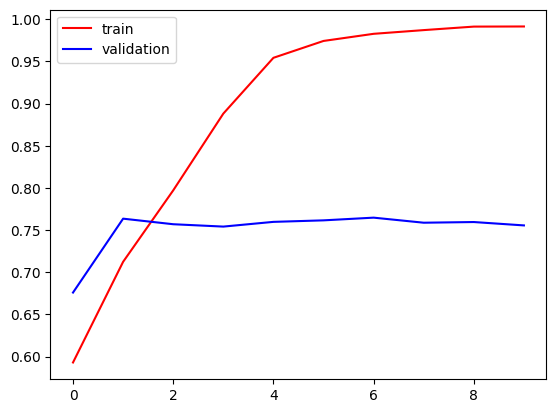

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


# The increased gap shows that model is overfitted.

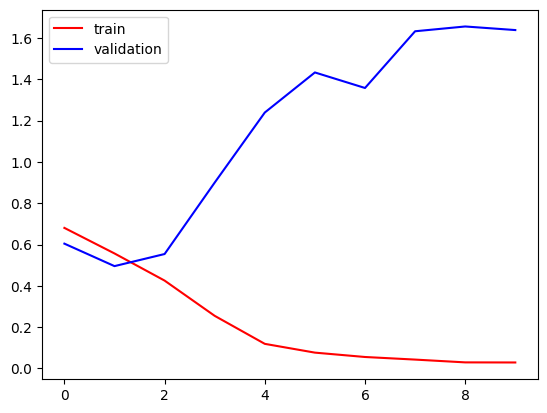

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# The increased gap shows that model is overfitted.

In [14]:
# WAYS TO REDUCE OVERFITTING

# ADD MORE DATA
# DATA AUGMENTATION ---> to increase the diversity of a training dataset without actually collecting new data.

In [19]:
import cv2

test_img = cv2.imread('/content/cat.jpg')
test_img.shape

(427, 640, 3)

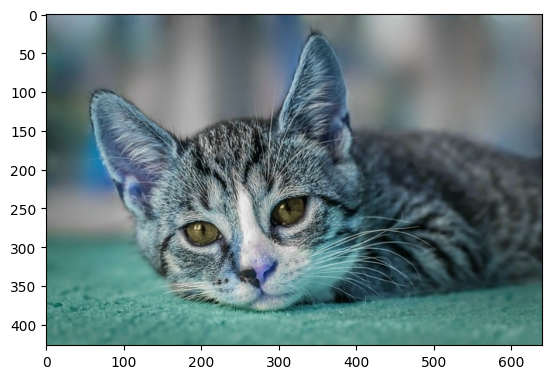

In [20]:
plt.imshow(test_img)

In [23]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[0.]], dtype=float32)

In [ ]:
# 0 ---> cat ---> correct

In [26]:
test_img = cv2.imread('/content/dog.jpeg')
test_img.shape

(183, 275, 3)

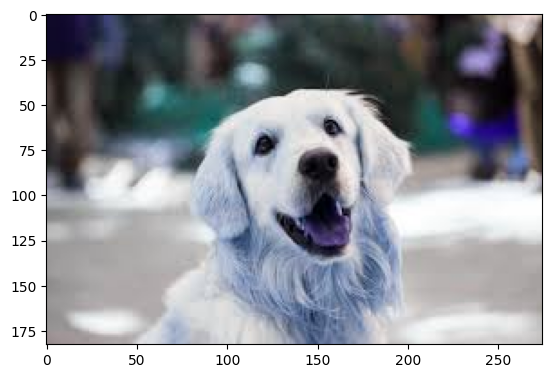

In [27]:
plt.imshow(test_img)

In [28]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[1.]], dtype=float32)

In [ ]:
# 1 --> dog --> correctly predicted